# Task: Mechanical Design Optimization

Objective: To build machine learning models for the inverse problem of mechanical design optimization.

Description: Engineers use numerical models to analyze the behavior of a system. But when the models are too complex, the numerical simulation can last from a few hours to a few days. In addition, during the optimization process, one might need tens if not hundreds of trials. So in order to simplify the process, we need to build a simple surrogate model that yields similar results to the numerical one. We use machine learning model to build the surrogate model. 

Data: The dataset contains the data of about 6000 numerical simulations (finite element models, FEM).There are 9 input parameters and 4 output results. (https://www.kaggle.com/daalgi/fem-simulations)

Inputs (continuous and positive values): (1) load parameters: ecc, N, gammaG. (2) material parameters: Esoil, Econc. (3) geometry parameters: Dbot, H1, H2, H3.

Outputs (continuous values): (1) stress related results: Mr_t, Mt_t, Mr_c, Mt_c.

Build simple machine learning modeling using Python scikit-learn, Pandas, Numpy, and Seaborn.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
FILE = '5184doe.csv'

In [3]:
df_doe = pd.read_csv(FILE)
df_doe.head()

,Sample,ecc,N,gammaG,Esoil,Econc,Dbot,H1,H2,H3,Mr_t,Mt_t,Mr_c,Mt_c
0,1,0,2000,0.9,25,30000,17,0.8,1.0,0.8,0.082100,0.055648,0.082100,0.055648
1,2,10,2000,0.9,25,30000,17,0.8,1.0,0.8,-0.597084,-0.233470,1.160648,0.605016
2,3,18,2000,0.9,25,30000,17,0.8,1.0,0.8,-1.094196,-0.566130,1.908188,0.947770
3,4,26,2000,0.9,25,30000,17,0.8,1.0,0.8,-1.416485,-0.865039,2.844706,1.310545
4,5,0,2000,0.9,25,37000,17,0.8,1.0,0.8,0.079570,0.054213,0.079570,0.054213


In [4]:
df_doe.describe()

,Sample,ecc,N,gammaG,Esoil,Econc,Dbot,H1,H2,H3,Mr_t,Mt_t,Mr_c,Mt_c
count,5184.000000,5184.000000,5184.000000,5184.00000,5184.000000,5184.000000,5184.000000,5184.00000,5184.000000,5184.00000,5184.000000,5184.000000,5184.000000,5184.000000
mean,2592.500000,13.500000,3500.000000,1.00000,50.000000,33500.000000,20.000000,1.20000,1.500000,1.20000,-1.629734,-0.810779,2.650433,1.518741
std,1496.636228,9.631609,1500.144697,0.10001,25.002412,3500.337626,2.449726,0.32663,0.408288,0.32663,1.426607,0.859657,2.475025,1.226075
min,1.000000,0.000000,2000.000000,0.90000,25.000000,30000.000000,17.000000,0.80000,1.000000,0.80000,-6.027412,-2.968574,0.024414,0.014080
25%,1296.750000,7.500000,2000.000000,0.90000,25.000000,30000.000000,17.000000,0.80000,1.000000,0.80000,-2.402849,-1.191169,0.251651,0.458440
50%,2592.500000,14.000000,3500.000000,1.00000,50.000000,33500.000000,20.000000,1.20000,1.500000,1.20000,-1.554450,-0.620024,2.138881,1.349318
75%,3888.250000,20.000000,5000.000000,1.10000,75.000000,37000.000000,23.000000,1.60000,2.000000,1.60000,-0.176328,0.018693,3.716968,2.413945
max,5184.000000,26.000000,5000.000000,1.10000,75.000000,37000.000000,23.000000,1.60000,2.000000,1.60000,0.251917,0.201895,9.408445,4.585227


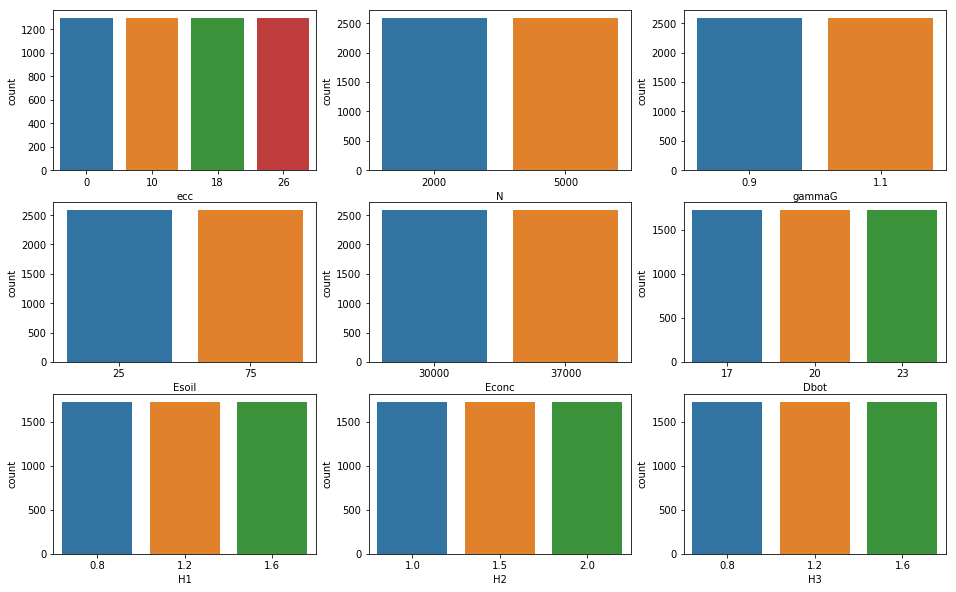

In [5]:
# count plot
figure, axes = plt.subplots(3, 3,figsize = (16,10))
row,col = 0, 0
sns.countplot(x='ecc',data = df_doe, ax = axes[row,col])
# axes[row,col].set_aspect('equal', 'box')

row,col = 0, 1
sns.countplot(x='N',data = df_doe, ax = axes[row,col])
# axes[row,col].set_aspect('equal', 'box')

row,col = 0, 2
sns.countplot(x='gammaG',data = df_doe, ax = axes[row,col])
# axes[row,col].set_aspect('equal', 'box')

row,col = 1, 0
sns.countplot(x='Esoil',data = df_doe, ax = axes[row,col])
# axes[row,col].set_aspect('equal', 'box')

row,col = 1, 1
sns.countplot(x='Econc',data = df_doe, ax = axes[row,col])
# axes[row,col].set_aspect('equal', 'box')

row,col = 1, 2
sns.countplot(x='Dbot',data = df_doe, ax = axes[row,col])
# axes[row,col].set_aspect('equal', 'box')

row,col = 2, 0
sns.countplot(x='H1',data = df_doe, ax = axes[row,col])
# axes[row,col].set_aspect('equal', 'box')

row,col = 2, 1
sns.countplot(x='H2',data = df_doe, ax = axes[row,col])
# axes[row,col].set_aspect('equal', 'box')

row,col = 2, 2
sns.countplot(x='H3',data = df_doe, ax = axes[row,col])
# axes[row,col].set_aspect('equal', 'box')

In [6]:
# X and y for supervised learning
X = df_doe.drop(['Sample','ecc'],axis = 1)
y_pre = df_doe['ecc']

In [7]:
y_str = y_pre.astype(str)
y = pd.get_dummies(y_str)
y.head()

,0,10,18,26
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [8]:
X.head()

,N,gammaG,Esoil,Econc,Dbot,H1,H2,H3,Mr_t,Mt_t,Mr_c,Mt_c
0,2000,0.9,25,30000,17,0.8,1.0,0.8,0.082100,0.055648,0.082100,0.055648
1,2000,0.9,25,30000,17,0.8,1.0,0.8,-0.597084,-0.233470,1.160648,0.605016
2,2000,0.9,25,30000,17,0.8,1.0,0.8,-1.094196,-0.566130,1.908188,0.947770
3,2000,0.9,25,30000,17,0.8,1.0,0.8,-1.416485,-0.865039,2.844706,1.310545
4,2000,0.9,25,37000,17,0.8,1.0,0.8,0.079570,0.054213,0.079570,0.054213


In [9]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y)

# Normalization

In [10]:
# Preprocessing & Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_pre)
# Train and Test data before feature selection
X_train = scaler.transform(X_train_pre)
X_test = scaler.transform(X_test_pre)

C:\Users\yaotang\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\yaotang\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\yaotang\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [11]:
y_train.head()

,0,10,18,26
62,0,0,1,0
335,0,0,0,1
1751,0,0,0,1
1450,0,0,1,0
4249,0,1,0,0


Module to Plot Figure

In [12]:
def plot_result(y_test,y_pred):
    figure, axes = plt.subplots(3, 3,figsize = (12,12))
    
    row,col = 0, 0
    r2 = r2_score(y_test['ecc'], y_pred['ecc'])
    sns.regplot(x=y_test['ecc'],y = y_pred['ecc'],ci = 95, ax = axes[row,col])
    axes[row,col].set_title('ecc',fontsize = 16)
    axes[row,col].set_xlabel('')
    axes[row,col].set_ylabel('')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(5,20,'R2 = {:3.3f}'.format(r2),fontsize = 12)
    
    row,col = 0, 1
    r2 = r2_score(y_test['N'], y_pred['N'])
    sns.regplot(x=y_test['N'],y = y_pred['N'],ci = 95, ax = axes[row,col])
    axes[row,col].set_title('N',fontsize = 16)
    axes[row,col].set_xlabel('')
    axes[row,col].set_ylabel('')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(2500,4000,'R2 = {:3.3f}'.format(r2),fontsize = 12)
    
    row,col = 0, 2
    r2 = r2_score(y_test['gammaG'], y_pred['gammaG'])
    sns.regplot(x=y_test['gammaG'],y = y_pred['gammaG'],ci = 95, ax = axes[row,col])
    axes[row,col].set_title('gammaG',fontsize = 16)
    axes[row,col].set_xlabel('')
    axes[row,col].set_ylabel('')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(1,1.05,'R2 = {:3.3f}'.format(r2),fontsize = 12)
    
    
    row,col = 1, 0
    r2 = r2_score(y_test['Esoil'], y_pred['Esoil'])
    sns.regplot(x=y_test['Esoil'],y = y_pred['Esoil'],ci = 95, ax = axes[row,col])
    axes[row,col].set_title('Esoil',fontsize = 16)
    axes[row,col].set_xlabel('')
    axes[row,col].set_ylabel('Predict')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(40,60,'R2 = {:3.3f}'.format(r2),fontsize = 12)
    
    row,col = 1, 1
    r2 = r2_score(y_test['Econc'], y_pred['Econc'])
    sns.regplot(x=y_test['Econc'],y = y_pred['Econc'],ci = 95, ax = axes[row,col])
    axes[row,col].set_title('Econc',fontsize = 16)
    axes[row,col].set_xlabel('')
    axes[row,col].set_ylabel('')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(30000,35000,'R2 = {:3.3f}'.format(r2),fontsize = 12)
    
    row,col = 1, 2
    r2 = r2_score(y_test['Dbot'], y_pred['Dbot'])
    sns.regplot(x=y_test['Dbot'],y = y_pred['Dbot'],ci = 95, ax = axes[row,col])
    axes[row,col].set_title('Dbot',fontsize = 16)
    axes[row,col].set_xlabel('')
    axes[row,col].set_ylabel('')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(18,22,'R2 = {:3.3f}'.format(r2),fontsize = 12)
    
    row,col = 2, 0
    r2 = r2_score(y_test['H1'], y_pred['H1'])
    sns.regplot(x=y_test['H1'],y = y_pred['H1'],ci = 95, ax = axes[row,col])
    axes[row,col].set_title('H1',fontsize = 16)
    axes[row,col].set_xlabel('')
    axes[row,col].set_ylabel('')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(1,1.5,'R2 = {:3.3f}'.format(r2),fontsize = 12)
    
    row,col = 2, 1
    r2 = r2_score(y_test['H2'], y_pred['H2'])
    sns.regplot(x=y_test['H2'],y = y_pred['H2'],ci = 95, ax = axes[row,col])
    axes[row,col].set_title('H2',fontsize = 16)
    axes[row,col].set_xlabel('Test')
    axes[row,col].set_ylabel('')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(1.25,1.8,'R2 = {:3.3f}'.format(r2),fontsize = 12)
    
    row,col = 2, 2
    r2 = r2_score(y_test['H3'], y_pred['H3'])
    sns.regplot(x=y_test['H3'],y = y_pred['H3'],ci = 95, ax = axes[row,col])
    axes[row,col].set_title('H3',fontsize = 16)
    axes[row,col].set_xlabel('')
    axes[row,col].set_ylabel('')
    axes[row,col].set_aspect('equal', 'box')
    axes[row,col].text(1000,3000,'R2 = {:3.3f}'.format(r2),fontsize = 12)
    

In [13]:
# plot_result(y_test,y_pred)

# Simple ML Classifiers

### k-neighbors regression

In [17]:
import tools.plot as plot
classes = np.array(["0", "10", "18", "26"])

Confusion matrix, without normalization
[[298  15   0   0]
 [ 14 305   2   0]
 [ 14   1 309   1]
 [  1   0  24 312]]


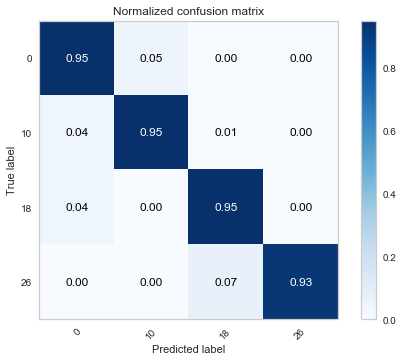

Accuracy on test set: 0.944


In [30]:
# (1) k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

plot.plot_cm(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), classes=classes, normalize=True)
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Confusion matrix, without normalization
[[313   0   0   0]
 [ 24 297   0   0]
 [305   9  11   0]
 [  0   1  50 286]]


C:\Users\yaotang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaotang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaotang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yaotang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


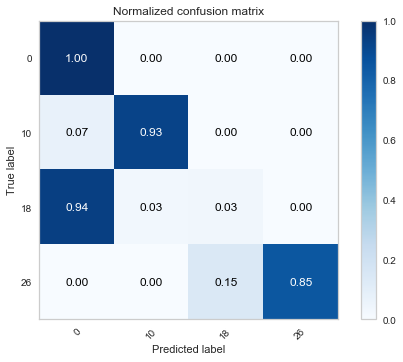

Accuracy on test set: 0.688


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

model = MultiOutputClassifier(LogisticRegression())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

plot.plot_cm(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), classes=classes, normalize=True)
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Confusion matrix, without normalization
[[313   0   0   0]
 [  0 321   0   0]
 [  5   0 320   0]
 [  0   0   0 337]]


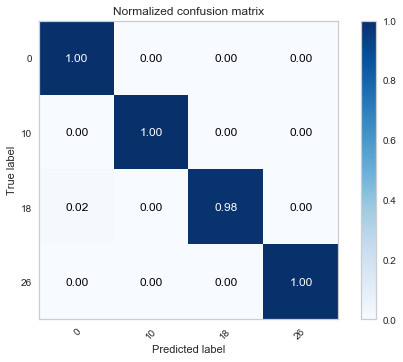

Accuracy on test set: 0.996


In [39]:
#(5) support vector machine (SVM)
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

model = MultiOutputClassifier(SVC(C = 3))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

plot.plot_cm(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), classes=classes, normalize=True)
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Confusion matrix, without normalization
[[313   0   0   0]
 [  0 321   0   0]
 [  0   0 325   0]
 [  0   0   0 337]]


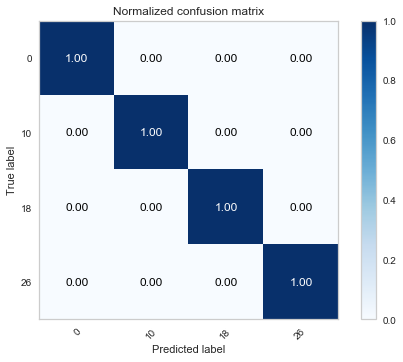

Accuracy on test set: 1.000


In [25]:
# (6) decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier

# model = MultiOutputClassifier(LinearSVC())
model = DecisionTreeClassifier(random_state = 2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

plot.plot_cm(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), classes=classes, normalize=True)
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Confusion matrix, without normalization
[[313   0   0   0]
 [  4 317   0   0]
 [  0   0 325   0]
 [  2   0   0 335]]


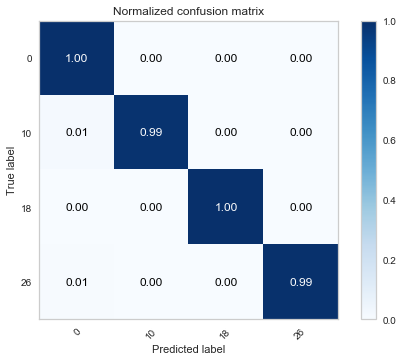

Accuracy on test set: 0.995


In [26]:
# (8) Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=2, random_state=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

plot.plot_cm(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), classes=classes, normalize=True)
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Confusion matrix, without normalization
[[313   0   0   0]
 [  0 321   0   0]
 [  0   0 325   0]
 [  0   0   0 337]]


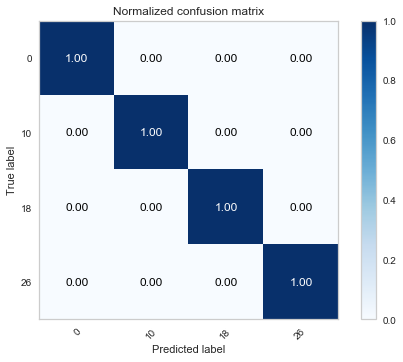

Accuracy on test set: 1.000


In [28]:
# (9) Gradient Boosted Regression Trees
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier

model = MultiOutputClassifier(GradientBoostingClassifier(random_state=0))

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

plot.plot_cm(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), classes=classes, normalize=True)
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Confusion matrix, without normalization
[[313   0   0   0]
 [  0 321   0   0]
 [  0   0 325   0]
 [  0   0   0 337]]


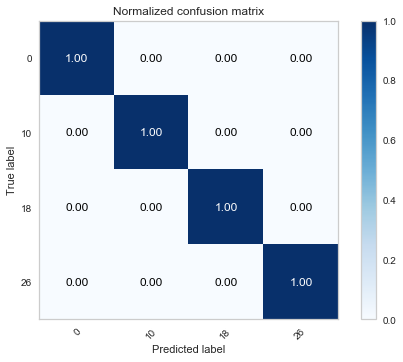

Accuracy on test set: 1.000


In [29]:
#(10) Neural Networks
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', random_state=0)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

plot.plot_cm(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), classes=classes, normalize=True)
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))